###  Notebook for comparison of kernel size for img_0.jpg 

In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#### Prep for data loader

Import original image for analysis

In [5]:
basedir = "/home/tkurihana/Paxis/sanity/mnist_figs_N360"

In [7]:
img = Image.open(os.path.join(basedir, "img_0.jpg"))

In [8]:
img = np.asarray(img)

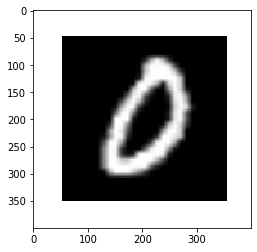

In [9]:
plt.figure()
plt.imshow(img)
plt.show()

Import data 

In [10]:
def txt_reader(filename):
    data = []
    with open(filename, 'r') as f:
        lines = f.read()
        for line in lines.split('\n'):
            if len(line) > 0:
                data.append(float(line.strip(' ')))
    return np.asarray(data)

In [71]:
def csv_reader(filename):
    """ .csv file --> table of , and \n files
    """
    with open(filename, 'r') as f:
        lines = f.read()
        all_list = []
        for line in lines.split('\n'):
            data =line.split(',')
            try:
                data.remove('')
            except:
                pass
            msize = np.zeros((len(data))).astype(np.complex)
            for idx,i in enumerate(data):
                if len(i) > 0:
                    j = i.replace('i','j')
                    data[idx] = complex(j)
            
            if len(data) > 0:
                all_list.append(np.expand_dims(data, axis=0))
        array = np.concatenate(all_list, axis=0)
    return array

In [86]:
basedatadir = '/home/tkurihana/Paxis/sanity/fprint-test'

In [109]:
angle_alist= []
table_alist = []
for j in [300,128,100,60,28,14,8, 4]:
    datadir = os.path.join(basedatadir, f'sz{j}')
    for i in range(0,1,1):
        angle_alist.append(txt_reader(os.path.join(datadir, f'img_{i}.txt')))
        table_alist.append(csv_reader(os.path.join(datadir, f'img_{i}_table.csv')))

In [110]:
len(angle_alist), len(table_alist)

(8, 8)

#### Visualization

In [21]:
def quiver_fn(img, orient):
    step1 = img.shape[0]/orient.shape[0]
    step2 = img.shape[1]/orient.shape[1]
    x, y = np.meshgrid(
        np.arange(step1/2,img.shape[0],step1),
        np.arange(step2/2,img.shape[1],step2),
    )
    u = -orient.real / abs(orient)
    v = -1*orient.imag / abs(orient)
    """ Must flip v, u instead of u, v for converting matlab to python system
    """
    return x,y,v, u

In [53]:
def base_plot(imgs, orients, size=(4,3),dpi=100, titles=[],
              nrow=2, ncol=5, expname=None, linewidth=5,headlength=15,
              scale=4,width=0.01,alpha=1,headwidth=3,color='black',
              cmap='jet', nmin=0, nmax=1, nclusters=6, fontsize=12):
    fig,ax  = plt.subplots(nrow, ncol,figsize=size,dpi=dpi)
    plt.subplots_adjust(wspace=0.01, hspace=0.01)
    
    for ii,i in enumerate(range(len(orients))) :
        ax[ii].imshow(img,vmin=nmin, vmax=nmax, cmap=cmap,alpha=alpha)
        ax[ii].set_xticklabels([])
        ax[ii].set_yticklabels([])
        ax[ii].axis('off')
            
        # quiver
        #print(_orients.shape);stop
        x,y,u,v = quiver_fn(img, orients[ii])
        #print(x,y,u,v)
        ax[ii].quiver(x,y,u,v,color=color, 
                            linewidth=linewidth,units='width',
                            scale=scale, width=width, headwidth=headwidth)
           
        ax[ii].set_title(f"${int(np.nanmedian(titles[ii]) )}^\circ$", 
                                  fontsize=fontsize,y=.9)
    fig.tight_layout()
    plt.show()
    #plt.savefig('./mnist-with-arrows_fprint.png')
    plt.close()

In [ ]:
base_plot(img, orients=table_alist,titles=angle_alist,
          size=(4,12),dpi=100, nrow=1, ncol=4, 
          linewidth=8, nclusters=6,cmap='gist_gray',color='red',
          headlength=25,headwidth=9,alpha=0.6,scale=5.5, width=0.015,fontsize=14)

###### MEMO (Sep. 07 2020)
Two points I should debug.  

- (1): table.csv file still stores every 4 components,which is good for kernel size (sz) = 400, but not align with smaller size since there should be more components in each row.
- (2): many nan input might hamper to compute quiver. I need to examine this point

#### (2) Issue 

In [111]:
table_nan_list = []
for itable in table_alist:
    tmp = np.asarray(itable)
    nan_idx = np.where(np.isnan(tmp))
    tmp[nan_idx]= 0.0
    table_nan_list.append(tmp)

/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


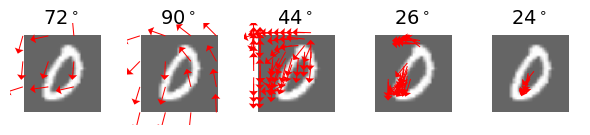

In [80]:
base_plot(img, orients=table_nan_list,titles=angle_alist,
          size=(6,12),dpi=100, nrow=1, ncol=5, 
          linewidth=8, nclusters=6,cmap='gist_gray',color='red',
          headlength=25,headwidth=9,alpha=0.6,scale=5.5, width=0.01,fontsize=14)

/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


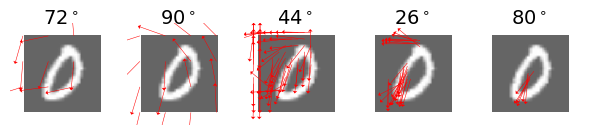

In [93]:
base_plot(img, orients=table_nan_list,titles=angle_alist,
          size=(6,12),dpi=100, nrow=1, ncol=5, 
          linewidth=8, nclusters=6,cmap='gist_gray',color='red',
          headlength=25,headwidth=9,alpha=0.6,scale=3.5, width=0.005,fontsize=14)

/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


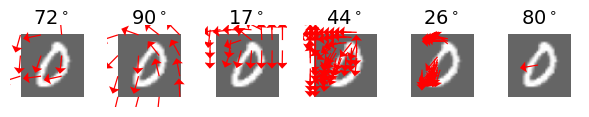

In [98]:
base_plot(img, orients=table_nan_list,titles=angle_alist,
          size=(6,12),dpi=100, nrow=1, ncol=6, 
          linewidth=8, nclusters=6,cmap='gist_gray',color='red',
          headlength=25,headwidth=9,alpha=0.6,scale=4.5, width=0.015,fontsize=14)

/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


ValueError: cannot convert float NaN to integer

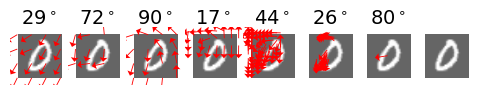

In [112]:
base_plot(img, orients=table_nan_list,titles=angle_alist,
          size=(6,12),dpi=100, nrow=1, ncol=8, 
          linewidth=8, nclusters=6,cmap='gist_gray',color='red',
          headlength=25,headwidth=9,alpha=0.6,scale=4.5, width=0.015,fontsize=14)

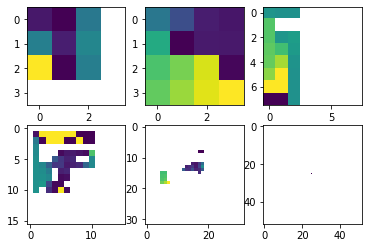

In [101]:
plt.figure()
for idx, i in enumerate(table_nan_list):
    ax = plt.subplot(2,3,idx+1)
    h,w = i.shape
    a = np.asarray(angle_alist[idx]).reshape(h,w)
    plt.imshow(a)
plt.show()
plt.close()

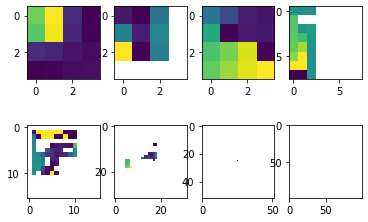

In [113]:
plt.figure()
for idx, i in enumerate(table_nan_list):
    ax = plt.subplot(2,4,idx+1)
    h,w = i.shape
    a = np.asarray(angle_alist[idx]).reshape(h,w)
    plt.imshow(a)
plt.show()
plt.close()

#### Show distribution of image_0

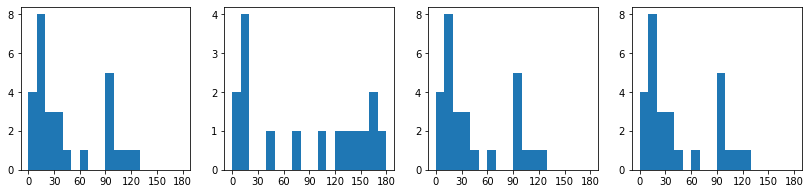

Number of valid components == 1023


In [45]:
plt.figure(figsize=(14,3))

for i, alist in enumerate(angle_alist):
    ax = plt.subplot(1,4,i+1)
    a = np.asarray(alist)
    nan_idx = np.where(np.isnan(a))
    b = [j for jdx, j in enumerate(a) if not j in nan_idx[0]]
    plt.hist(b, bins=np.arange(0,181,10))
    plt.xticks(np.arange(0,181,30))
plt.show()
print("Number of valid components == {}".format(len(b)))